In [32]:
from oop_functions.merge_dataset_functions import merge_data_over_years
from oop_functions.missing_values_functions import print_records_vs_unique
from oop_functions.util_functions import *
from processing_functions import *
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [33]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)

In [34]:
processed_data['was_screened']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
658779    0.0
658780    0.0
658781    0.0
658782    0.0
658783    0.0
Name: was_screened, Length: 658784, dtype: float64

In [35]:
merged_df = personal_data
merged_df['ph_any_not_ovar_bq'] = merged_df['ph_any_bq']
merged_df.loc[merged_df[merged_df['ph_ovar_bq'] == 1].index, 'ph_any_not_ovar_bq'] = 0

In [36]:
get_cols_missing_percentage(0, personal_data[['bq_age', 'age', 'center']], '')

3 columns were over 0 missing. This is the list of columns: ['age', 'center', 'bq_age']
The table of features missing over 0 percentage: 
+--------+---------------+---------------+---------------+-------------------+
|        | column_name   |   num_missing |   num_present |   percent_missing |
|--------+---------------+---------------+---------------+-------------------|
| age    | age           |             0 |         78209 |           0       |
| center | center        |             0 |         78209 |           0       |
| bq_age | bq_age        |          2094 |         76115 |           2.67744 |
+--------+---------------+---------------+---------------+-------------------+


,column_name,num_missing,num_present,percent_missing
age,age,0,78209,0.000000
center,center,0,78209,0.000000
bq_age,bq_age,2094,76115,2.677441


In [37]:
get_cols_missing_percentage(0, screen_data[['lvol_p', 'rvol_p', 'ovary_voll', 'ovary_volr']], '')

4 columns were over 0 missing. This is the list of columns: ['ovary_volr', 'rvol_p', 'ovary_voll', 'lvol_p']
The table of features missing over 0 percentage: 
+------------+---------------+---------------+---------------+-------------------+
|            | column_name   |   num_missing |   num_present |   percent_missing |
|------------+---------------+---------------+---------------+-------------------|
| ovary_volr | ovary_volr    |        106185 |         44808 |           70.3245 |
| rvol_p     | rvol_p        |        106204 |         44789 |           70.337  |
| ovary_voll | ovary_voll    |        107313 |         43680 |           71.0715 |
| lvol_p     | lvol_p        |        107337 |         43656 |           71.0874 |
+------------+---------------+---------------+---------------+-------------------+


,column_name,num_missing,num_present,percent_missing
ovary_volr,ovary_volr,106185,44808,70.324452
rvol_p,rvol_p,106204,44789,70.337035
ovary_voll,ovary_voll,107313,43680,71.071507
lvol_p,lvol_p,107337,43656,71.087401


In [38]:
cols = select_features_endswith(screen_data, ['_q']) + select_features_endswith(screen_data, ['_p'])
get_cols_missing_percentage(0, screen_data[cols], '')

21 columns were over 0 missing. This is the list of columns: ['detr_p', 'detl_p', 'rtran_p', 'rlong_p', 'rantero_p', 'rvol_p', 'lantero_p', 'ltran_p', 'llong_p', 'lvol_p', 'tvu_assess_days_q', 'detl_q', 'detr_q', 'rlong_q', 'rantero_q', 'rvol_q', 'rtran_q', 'ltran_q', 'llong_q', 'lantero_q', 'lvol_q']
The table of features missing over 0 percentage: 
+-------------------+-------------------+---------------+---------------+-------------------+
|                   | column_name       |   num_missing |   num_present |   percent_missing |
|-------------------+-------------------+---------------+---------------+-------------------|
| detr_p            | detr_p            |         44791 |        106202 |           29.6643 |
| detl_p            | detl_p            |         44808 |        106185 |           29.6755 |
| rtran_p           | rtran_p           |        106193 |         44800 |           70.3298 |
| rlong_p           | rlong_p           |        106193 |         44800 |          

,column_name,num_missing,num_present,percent_missing
detr_p,detr_p,44791,106202,29.664289
detl_p,detl_p,44808,106185,29.675548
rtran_p,rtran_p,106193,44800,70.329750
rlong_p,rlong_p,106193,44800,70.329750
rantero_p,rantero_p,106195,44798,70.331075
rvol_p,rvol_p,106204,44789,70.337035
lantero_p,lantero_p,107327,43666,71.080779
ltran_p,ltran_p,107328,43665,71.081441
llong_p,llong_p,107328,43665,71.081441
lvol_p,lvol_p,107337,43656,71.087401


In [39]:

get_cols_missing_percentage(0, personal_data[['ph_any_bq', 'ph_ovar_bq', 'ph_any_trial', 'ph_ovar_trial', 'ph_any_sqx', 'ph_ovar_sqx', 'ph_any_muq', 'ph_ovar_muq', 'ph_any_dqx', 'ph_ovar_dqx', 'ph_any_dhq', 'ph_ovar_dhq']], '')

12 columns were over 0 missing. This is the list of columns: ['ph_any_trial', 'ph_ovar_trial', 'ph_any_bq', 'ph_ovar_bq', 'ph_any_dhq', 'ph_ovar_dhq', 'ph_any_sqx', 'ph_ovar_sqx', 'ph_any_dqx', 'ph_ovar_dqx', 'ph_any_muq', 'ph_ovar_muq']
The table of features missing over 0 percentage: 
+---------------+---------------+---------------+---------------+-------------------+
|               | column_name   |   num_missing |   num_present |   percent_missing |
|---------------+---------------+---------------+---------------+-------------------|
| ph_any_trial  | ph_any_trial  |             0 |         78209 |           0       |
| ph_ovar_trial | ph_ovar_trial |             0 |         78209 |           0       |
| ph_any_bq     | ph_any_bq     |          2094 |         76115 |           2.67744 |
| ph_ovar_bq    | ph_ovar_bq    |          2094 |         76115 |           2.67744 |
| ph_any_dhq    | ph_any_dhq    |         16882 |         61327 |          21.5858  |
| ph_ovar_dhq   | ph_ova

,column_name,num_missing,num_present,percent_missing
ph_any_trial,ph_any_trial,0,78209,0.000000
ph_ovar_trial,ph_ovar_trial,0,78209,0.000000
ph_any_bq,ph_any_bq,2094,76115,2.677441
ph_ovar_bq,ph_ovar_bq,2094,76115,2.677441
ph_any_dhq,ph_any_dhq,16882,61327,21.585751
ph_ovar_dhq,ph_ovar_dhq,16882,61327,21.585751
ph_any_sqx,ph_any_sqx,23530,54679,30.086051
ph_ovar_sqx,ph_ovar_sqx,23530,54679,30.086051
ph_any_dqx,ph_any_dqx,46694,31515,59.704126
ph_ovar_dqx,ph_ovar_dqx,46694,31515,59.704126


In [40]:
personal_data[(personal_data['ph_any_trial'] != 9) & (personal_data['ph_any_trial'] != personal_data['ph_any_bq'])][['plco_id', 'ph_any_trial', 'ph_any_bq']]

,plco_id,ph_any_trial,ph_any_bq
1384,A-064871-9,0,1.0
7897,C-027694-0,1,NaN
14167,E-055794-4,0,1.0
14397,E-067593-6,0,1.0
16073,F-017599-4,0,1.0
19927,H-029949-7,1,NaN
20706,H-099375-0,1,NaN
21377,I-036979-5,0,1.0
21595,I-069496-0,1,NaN
22704,J-030501-2,0,1.0


In [41]:
personal_data[~((personal_data['ph_ovar_bq'].isna()) & (personal_data['ph_ovar_trial'] == 0)) & (personal_data['ph_ovar_trial'] != personal_data['ph_ovar_bq'])][['plco_id', 'ph_ovar_trial', 'ph_ovar_bq']]

,plco_id,ph_ovar_trial,ph_ovar_bq
14397,E-067593-6,0,1.0


In [42]:
personal_data[personal_data['ph_ovar_bq'] == 1][['plco_id', 'ph_ovar_trial', 'ph_ovar_bq']]

,plco_id,ph_ovar_trial,ph_ovar_bq
337,A-025469-9,1,1.0
14397,E-067593-6,0,1.0
20114,H-059946-7,1,1.0
21273,I-014210-9,1,1.0
23268,J-100026-5,1,1.0
28809,N-042106-6,1,1.0
52209,U-062570-9,1,1.0
52403,U-071147-5,1,1.0
61734,W-068611-5,1,1.0
67032,X-087062-7,1,1.0


In [43]:
get_column_values_count(personal_data, 'ph_any_trial')

,ph_any_trial,count
0,0,70937
1,1,5176
2,9,2096


In [44]:
get_column_values_count(personal_data, 'ph_ovar_trial')

,ph_ovar_trial,count
0,0,78194
1,1,15


In [45]:
get_column_values_count(personal_data, 'ph_any_bq')

,ph_any_bq,count
0,0.0,70916
1,1.0,5188
2,9.0,11


In [46]:
get_column_values_count(personal_data, 'ph_ovar_bq')

,ph_ovar_bq,count
0,0.0,76099
1,1.0,16


In [47]:
get_column_values_count(processed_data, 'ca125_result')

,ca125_result,count
0,1.0,148142
1,2.0,2437
2,4.0,314
3,8.0,91
4,9.0,5


In [48]:
get_column_values_count(processed_data, 'tvu_result')

,tvu_result,count
0,1.0,67174
1,2.0,3737
2,3.0,34240
3,4.0,1513
4,8.0,1689
5,9.0,42636


In [51]:
get_column_values_count(processed_data, 'ovar_behavior')

,ovar_behavior,count
0,1.0,12
1,2.0,7
2,3.0,3469


In [52]:
get_column_values_count(processed_data, 'ovar_histtype')

,ovar_histtype,count
0,1.0,115
1,2.0,1992
2,3.0,27
3,4.0,54
4,6.0,236
5,8.0,89
6,9.0,18
7,31.0,868
8,34.0,30
9,39.0,59


In [53]:

ovar_type_data = processed_data[['plco_id', 'ovar_histtype', 'was_screened']].drop_duplicates()
get_column_values_count(ovar_type_data[ovar_type_data['was_screened']==0], 'ovar_histtype')

,ovar_histtype,count
0,1.0,12
1,2.0,187
2,3.0,3
3,4.0,5
4,6.0,17
5,8.0,12
6,9.0,3
7,31.0,75
8,34.0,2


In [54]:

get_column_values_count(ovar_type_data[ovar_type_data['was_screened']==1], 'ovar_histtype')

,ovar_histtype,count
0,1.0,17
1,2.0,163
2,3.0,3
3,4.0,7
4,6.0,25
5,8.0,6
6,9.0,1
7,31.0,65
8,34.0,4
9,39.0,6


In [55]:

years = [1, 3, 5, 10]
for year in years:
    label = f'cancer_in_next_{year}_years' 
    print(f'Getting count for a merged dataset for label {label}')
    ovar_type_data = processed_data[['plco_id', 'ovar_histtype', label]].drop_duplicates()
    print_df(get_column_values_count(ovar_type_data, 'ovar_histtype'))

Getting count for a merged dataset for label cancer_in_next_1_years
+----+-----------------+---------+
|    |   ovar_histtype |   count |
|----+-----------------+---------|
|  0 |               1 |      49 |
|  1 |               2 |     673 |
|  2 |               3 |      11 |
|  3 |               4 |      22 |
|  4 |               6 |      81 |
|  5 |               8 |      36 |
|  6 |               9 |       8 |
|  7 |              31 |     271 |
|  8 |              34 |      11 |
|  9 |              39 |      12 |
+----+-----------------+---------+
Getting count for a merged dataset for label cancer_in_next_3_years
+----+-----------------+---------+
|    |   ovar_histtype |   count |
|----+-----------------+---------|
|  0 |               1 |      43 |
|  1 |               2 |     633 |
|  2 |               3 |      10 |
|  3 |               4 |      18 |
|  4 |               6 |      74 |
|  5 |               8 |      31 |
|  6 |               9 |       8 |
|  7 |              31 |

In [56]:
ovar_type_data = personal_data[['plco_id', 'ovar_histtype', 'ovar_behavior']].drop_duplicates()

In [57]:
get_column_values_count(ovar_type_data, 'ovar_behavior')

,ovar_behavior,count
0,1.0,2
1,2.0,1
2,3.0,610


In [58]:
get_column_values_count(ovar_type_data, 'ovar_histtype')

,ovar_histtype,count
0,1.0,29
1,2.0,350
2,3.0,6
3,4.0,12
4,6.0,42
5,8.0,18
6,9.0,4
7,31.0,140
8,34.0,6
9,39.0,6


## Cancer type distribution of `ovar_cancer`

In [59]:
year = 1
label = f'cancer_in_next_{year}_years' 
ovar_type_data = processed_data[['plco_id', 'ovar_histtype', 'ovar_cancer', label]]

array([[<AxesSubplot:title={'center':'ovar_histtype'}>,
        <AxesSubplot:title={'center':'ovar_cancer'}>],
       [<AxesSubplot:title={'center':'cancer_in_next_1_years'}>,
        <AxesSubplot:>]], dtype=object)

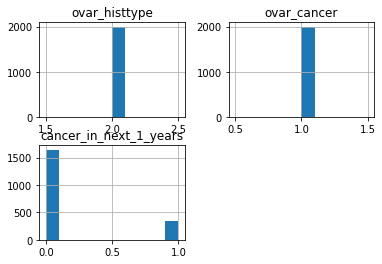

In [60]:
ovar_type_data[ovar_type_data['ovar_histtype'] == 2].hist()